#Assignment 3 - Penguin Classification Analysis
## by Ishika Lalwani

##1. Download the dataset and import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##2. Loading the dataset

In [2]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##3. Visualisation

### Univariate Analysis

<ipython-input-20-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

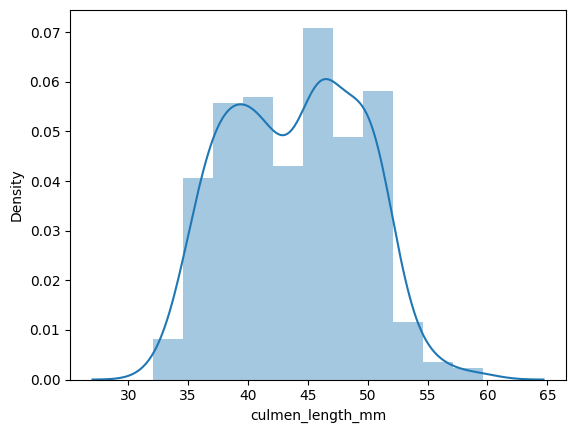

In [20]:
sns.distplot(df.culmen_length_mm)

<ipython-input-21-4b07ffb4fe44>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_depth_mm)


<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

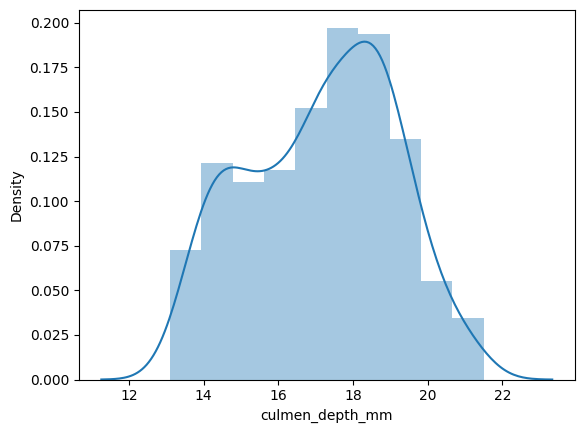

In [21]:
sns.distplot(df.culmen_depth_mm)

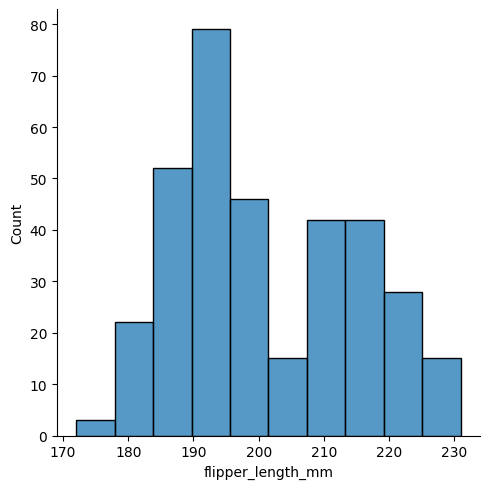

In [22]:
sns.displot(df.flipper_length_mm)

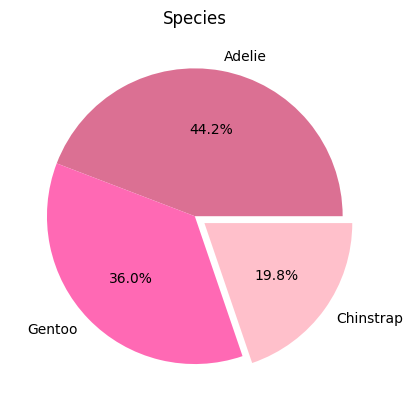

In [23]:
plt.pie(df.species.value_counts(), [0.00, 0, 0.08], labels = ['Adelie', 'Gentoo', 'Chinstrap'],autopct = '%1.1f%%', colors = ['palevioletred', 'hotpink', 'pink'])
plt.title("Species")
plt.show()

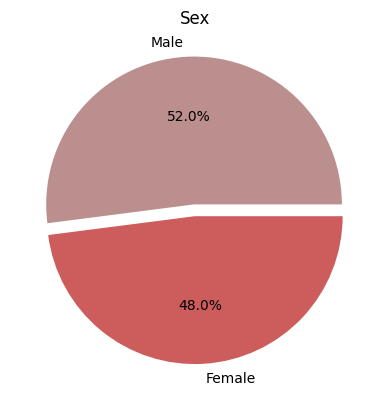

In [24]:
plt.pie(df.sex.value_counts(), [0.08, 0], labels = ['Male', 'Female'],autopct = '%1.1f%%', colors = ['rosybrown', 'indianred'])
plt.title("Sex")
plt.show()

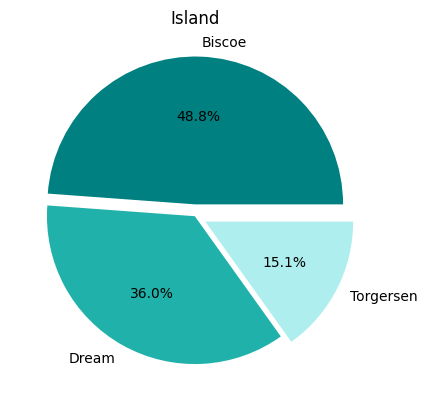

In [25]:
plt.pie(df.island.value_counts(), [0.08, 0, 0.08], labels = ['Biscoe', 'Dream', 'Torgersen'],autopct = '%1.1f%%', colors = ['teal', 'lightseagreen', 'paleturquoise'])
plt.title("Island")
plt.show()

### Bivariate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

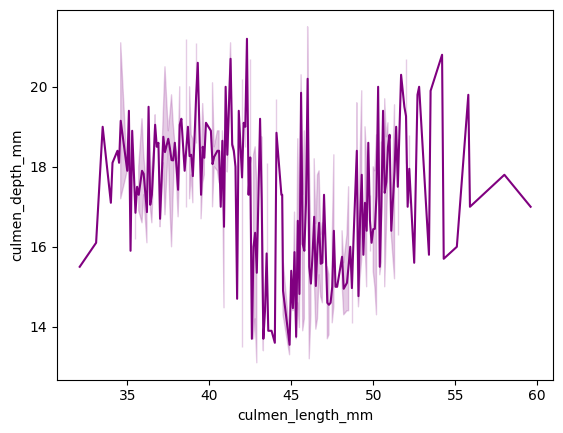

In [26]:
sns.lineplot(x=df.culmen_length_mm, y = df.culmen_depth_mm, color = 'purple')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

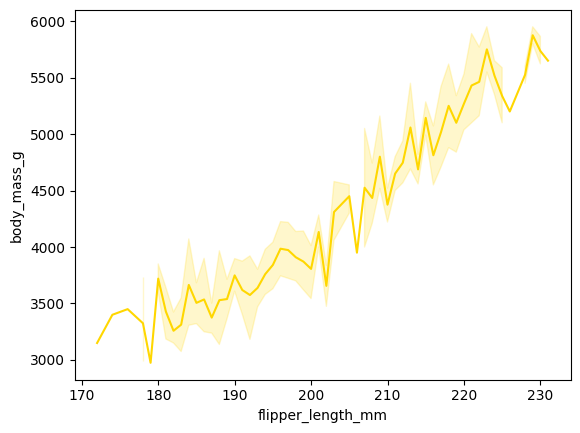

In [27]:
sns.lineplot(x = df.flipper_length_mm, y = df.body_mass_g, color = 'gold')

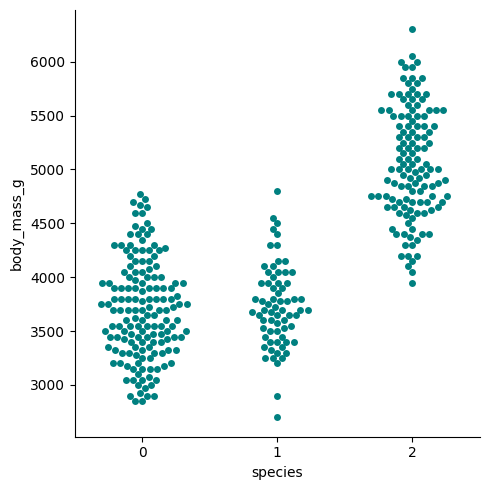

In [50]:
sns.catplot(data = df, x = 'species', y = 'body_mass_g', kind = 'swarm', color = 'teal')

### Multivariate Analysis

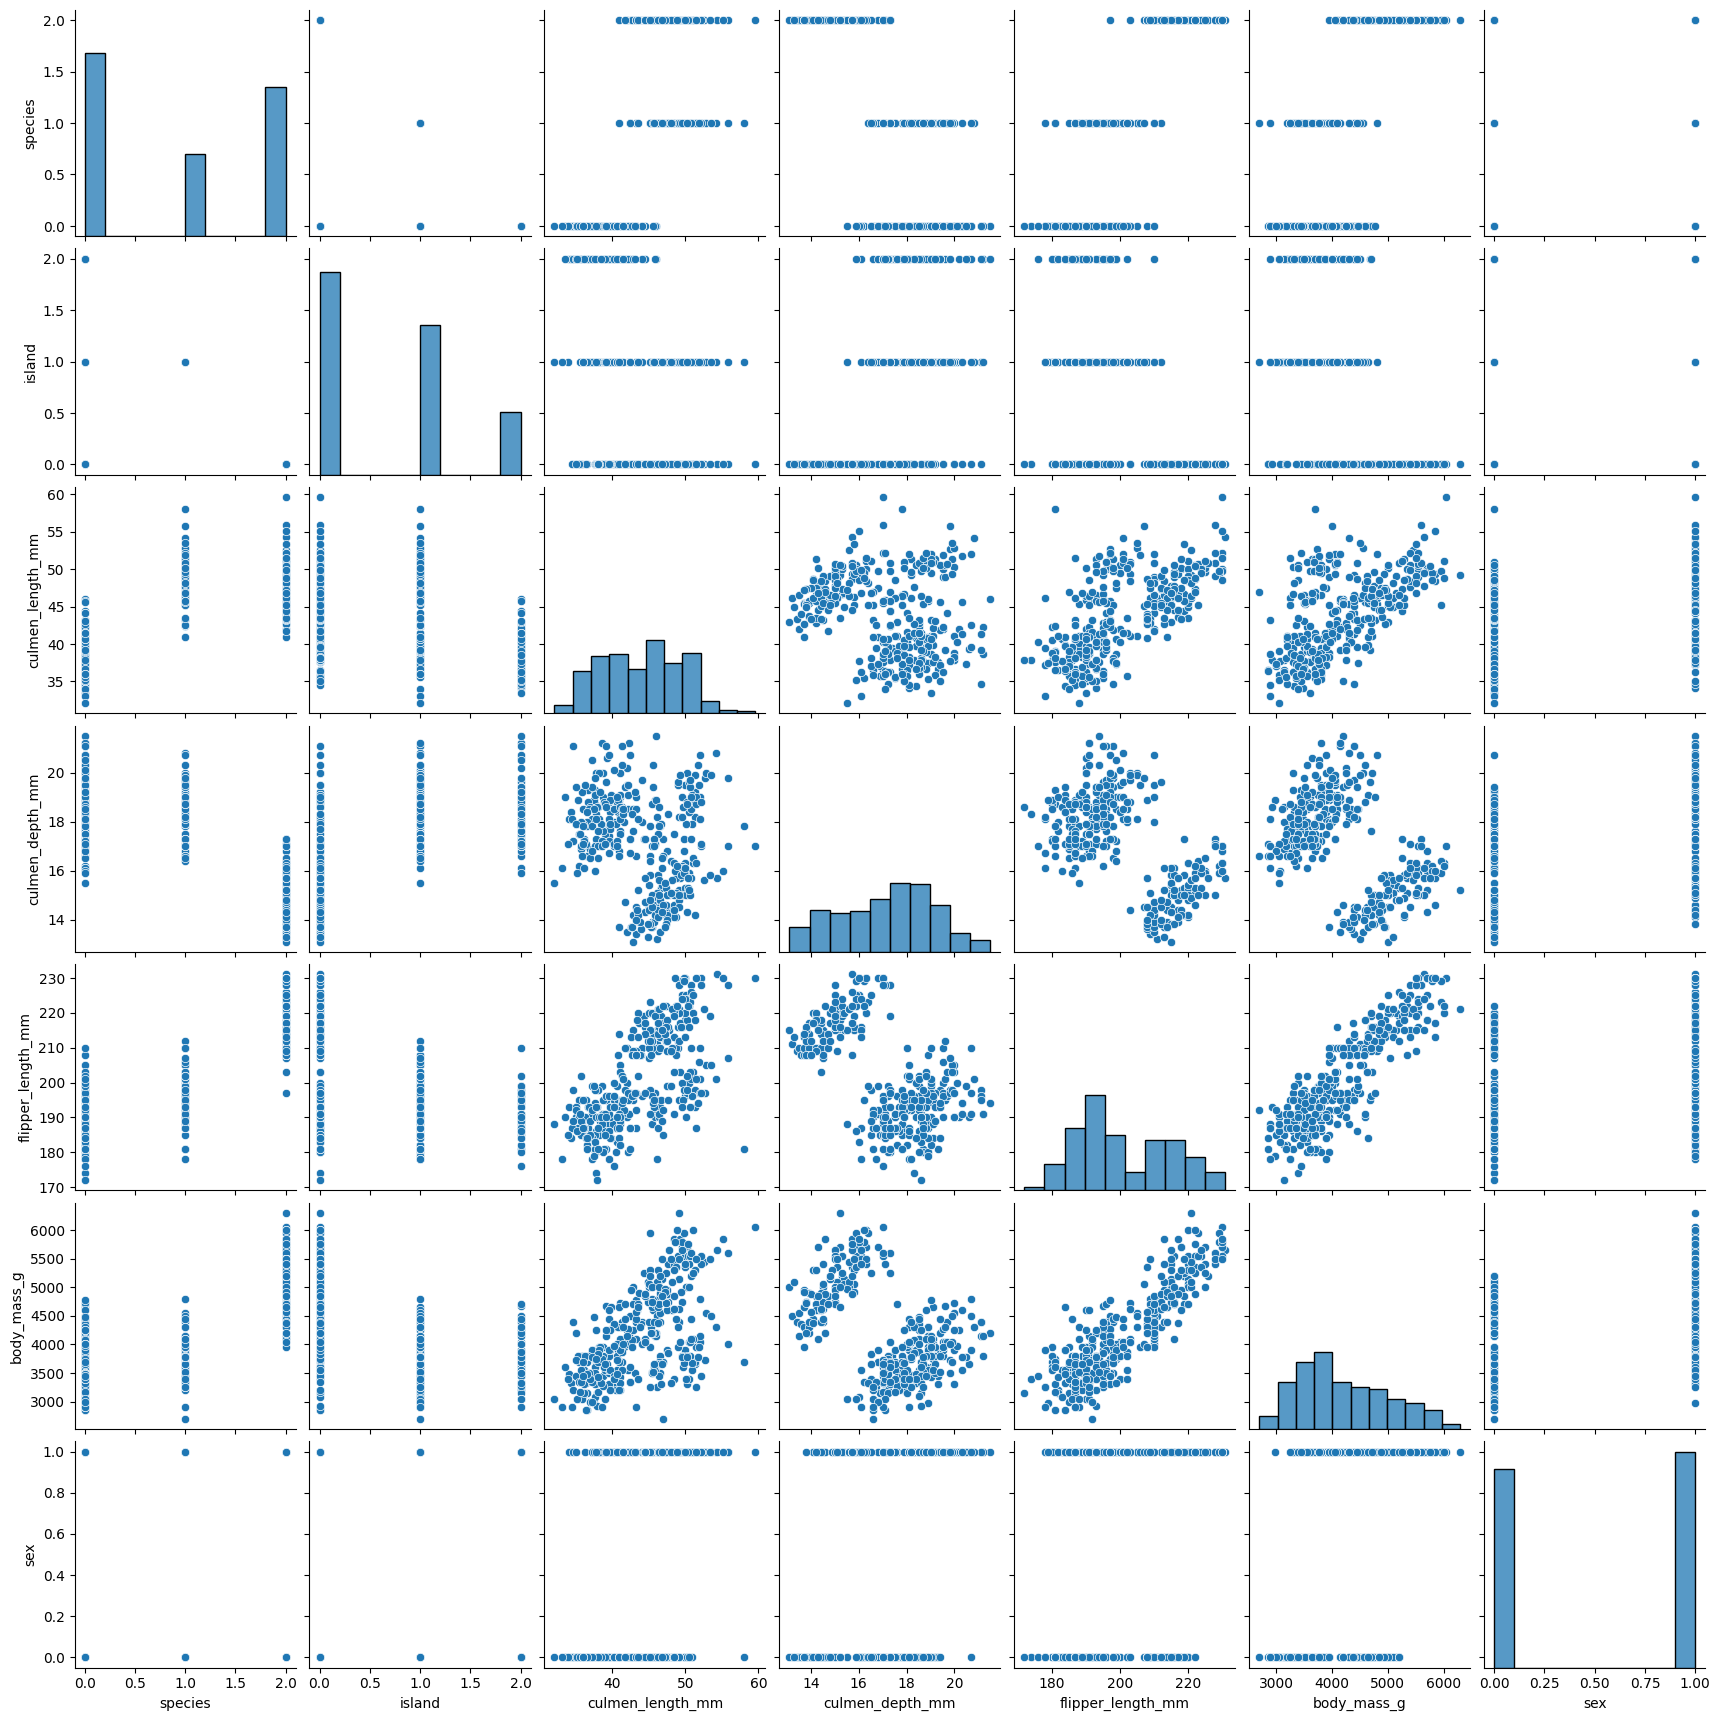

In [51]:
sns.pairplot(df)

<ipython-input-30-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

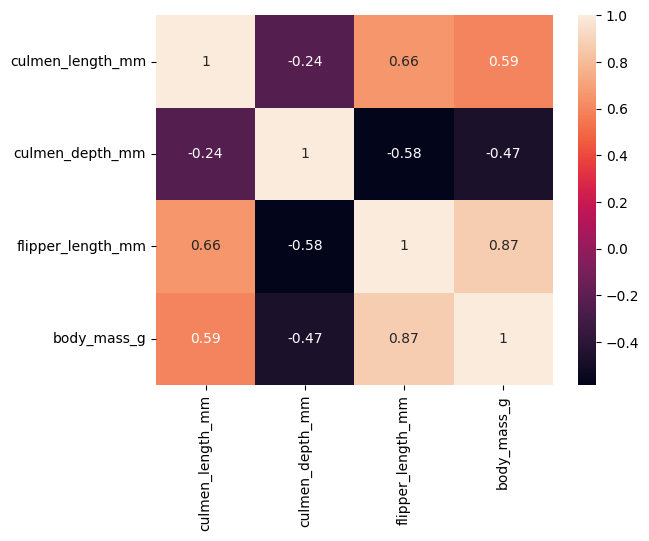

In [30]:
sns.heatmap(df.corr(), annot = True)

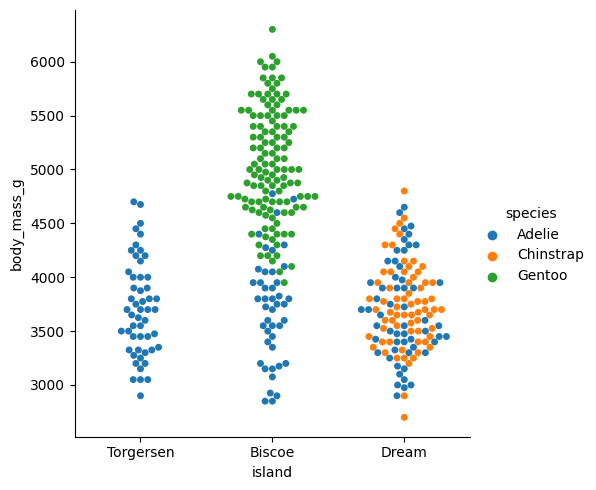

In [29]:
sns.catplot(data = df, x = 'island', y = 'body_mass_g', hue = 'species', kind = 'swarm')

##4. Descriptive Statistics

In [19]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##5. Checking and Handling Null Values

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [7]:
df['sex'] = df['sex'].replace(".", "MALE")

In [8]:
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [9]:
df['sex'] = df['sex'].fillna("MALE")

In [10]:
df['sex'].isnull().sum()

0

In [11]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [12]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [13]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [14]:
df.median()

<ipython-input-14-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [15]:
df = df.fillna(df.median())

<ipython-input-15-a187aa03e3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


##6. Finding and replacing outliers

<Axes: >

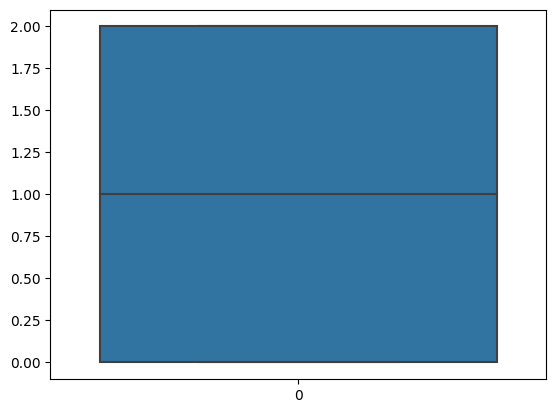

In [60]:
sns.boxplot(df.species)
# no outliers found

##7. Checking correlation of independent variable with the the target

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


In [45]:
df.corr().species.sort_values(ascending= False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

##8. Label Encoding (Categorical Variables)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df.sex = le.fit_transform(df.sex)
df.island = le.fit_transform(df.island)
df.species = le.fit_transform((df.species))
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


##9. X and Y split

In [61]:
X = df.drop(columns = ['species'], axis =1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [34]:
y = df.species
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64>

##10. Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [36]:
x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


##11. Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

In [38]:
x_train.shape

(240, 6)

In [46]:
y_train.shape

(240,)

In [39]:
x_test.shape

(104, 6)

In [47]:
y_test.shape

(104,)

## Model Building

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
lr.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(x_test)
y_pred

array([ 2.88574491e-01,  1.10715338e-01,  2.29384016e-01,  2.05896280e+00,
       -6.08913996e-02,  1.86758378e+00,  2.19971521e-01,  1.21457725e+00,
        1.81656167e+00,  1.85783292e-01,  3.27810391e-01,  1.81544855e+00,
        1.47213984e-01,  1.84774774e+00,  1.88251377e+00,  2.91780752e-01,
        1.88664000e-01,  1.76895103e+00,  4.20247376e-01,  1.80530654e-02,
        1.75001096e+00,  1.47256735e-01,  8.95558523e-01,  9.02257546e-02,
        2.01785560e+00,  2.23439175e+00,  1.63536605e+00,  1.10997938e-01,
        2.90478891e-01,  1.64944473e+00,  1.90892006e+00,  7.94562103e-01,
        2.74891660e-02,  2.81019458e-01, -1.24151576e-01,  9.57016545e-01,
        1.98326481e+00,  8.36268849e-01, -3.74758014e-03,  4.52041298e-01,
       -7.25766521e-02,  3.98603764e-01,  5.93981320e-02,  1.88540886e+00,
        1.80596227e+00, -3.59432541e-02,  2.02807113e+00,  1.20664123e+00,
        1.06009313e-01,  2.03655994e+00,  1.68612863e-02,  1.56430761e-01,
        1.64771762e-01,  

In [43]:
y_pred1 = lr.predict(x_train)
y_pred1

array([ 1.06544685,  2.12393704,  1.86584504,  2.45867719,  0.84919131,
        2.22054959,  1.68943851,  0.32637218, -0.40361291,  0.04375548,
        0.84099929,  0.21580919,  0.31626375,  0.71516567,  0.28940868,
       -0.08100659,  0.96694389,  0.1567867 ,  0.90306814,  0.147911  ,
        1.86129227,  1.83790941,  1.48793183,  0.91040677,  1.71949041,
        0.32587998, -0.05127144,  0.93469261,  0.48073887,  1.54430839,
        1.94690276,  0.21959857,  0.07002444,  2.07807502,  1.84289283,
        0.41936857,  0.90614199,  0.80361484,  2.11690806,  2.62293958,
        0.67585665,  0.5378391 ,  1.06377524,  1.94455687, -0.24770356,
        1.99546051,  1.08535827,  0.57688811,  0.84132731,  0.19774429,
        1.06890379,  0.66596343,  0.19199264,  0.41402056,  1.91436672,
        1.0360693 , -0.29589164,  1.70308467,  0.15040382,  2.04196448,
        0.02616826,  0.74279742,  2.04718867,  2.17510032,  0.71935431,
        0.76077486,  2.07024489,  0.73458762, -0.37125159,  2.07

In [44]:
pd.DataFrame({'Actual_profit':y_test, 'Predicted_profit':y_pred})

,Actual_profit,Predicted_profit
141,0,0.288574
6,0,0.110715
60,0,0.229384
249,2,2.058963
54,0,-0.060891
...,...,...
81,0,0.565305
1,0,0.307821
120,0,0.041648
8,0,-0.321385


## Evaluation

In [62]:
from sklearn import metrics

In [64]:
# Evaluating Testing Accuracy
print(metrics.r2_score(y_test, y_pred))

0.9291426430611965


In [65]:
# Evaluating Training Accuracy
print(metrics.r2_score(y_train, y_pred1))

0.9107467231582898
